In [2]:
from preprocess import *
from data_loader import *
import json
import os
import pandas as pd
from collections import namedtuple

In [3]:

def house_prices_train(args):
    train_data_full = pd.read_csv(os.path.join("data", "train.csv")).iloc[
        :, 1:
    ]  # remove first id column

    np.random.seed(151515)

    transforms = None
    with open(os.path.join("data", "transforms"), "r") as f:
        transforms = json.load(f)
        transforms = [tuple(list_) for list_ in transforms]

    train_data, eval_data = train_test_split_pandas(train_data_full)

    train_transformed, eval_transformed = get_transformed_data(
        train_data=train_data, eval_data=eval_data, transforms=transforms
    )
    return train_transformed, eval_transformed

    # train_dataset = get_dataset(
    #     x_num=train_transformed.X_num,
    #     x_cat=train_transformed.X_cat,
    #     y_data=train_transformed.y,
    #     batch_size=args.batch_size,
    #     buffer_size=len(train_data),
    #     numpy=True,
    # )
# 
    # eval_dataset = get_dataset(
    #     x_num=eval_transformed.X_num,
    #     x_cat=eval_transformed.X_cat,
    #     y_data=eval_transformed.y,
    #     batch_size=len(eval_data),  # all in a single batch
    #     buffer_size=len(eval_data),
    #     numpy=True,
    # )

In [4]:
Args = namedtuple("Args", ["batch_size"])

In [5]:
train, eval = house_prices_train(Args(batch_size=32))

(array([  5.,  10.,  38., 126., 323., 275., 164.,  58.,  10.,   3.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

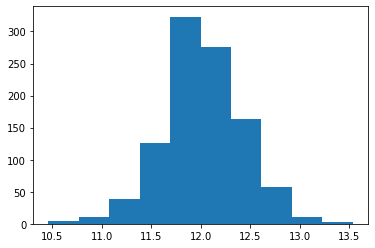

In [6]:
import matplotlib.pyplot as plt

plt.hist(train.y)

In [7]:
import numpy as np
np.isnan(train.X_num).sum()

0

In [8]:
train.X_num.shape

(1012, 16)

In [9]:
train.X_num.std(0), train.X_num.mean(0), train.X_num.min(0), train.X_num.max(0)

(array([0.49168493, 1.        , 0.31037006, 1.        , 0.45784538,
        0.68790221, 0.40671104, 1.        , 1.        , 0.34436219,
        0.26540385, 1.        , 0.4190759 , 0.37351354, 0.30506416,
        0.49711109]),
 array([-5.69867473e-01,  3.23824191e-16,  1.31971893e-01,  9.05731353e-16,
         4.32254803e-01,  1.68083004e-01, -4.76122113e-01,  1.17483976e-15,
         1.53418121e-15, -7.13438735e-01, -4.11725955e-02,  1.26430487e-15,
        -5.96837945e-01, -1.24011858e-01, -3.27719169e-01, -2.91052821e-02]),
 array([-1.        , -3.70421103, -1.        , -8.55307871, -1.        ,
        -1.        , -1.        , -3.71901843, -4.39455926, -1.        ,
        -1.        , -4.64503354, -1.        , -1.        , -1.        ,
        -1.        ]),
 array([1.        , 6.06513378, 1.        , 2.57492622, 1.        ,
        1.        , 1.        , 3.36608542, 3.58108398, 1.        ,
        1.        , 2.60901844, 1.        , 1.        , 1.        ,
        1.        ]))

In [10]:
train.X_cat.shape

(1012, 11)

In [11]:
np.isnan(train.X_cat).sum()

0

In [12]:
train.X_cat.dtype

dtype('int64')

In [13]:
print([np.unique(train.X_cat[:, i], return_counts=True)[1].min() for i in range(train.X_cat.shape[1])],
[ix for ix in range(train.X_cat.shape[1]) if np.unique(train.X_cat[:, ix], return_counts=True)[1].min() >= 50])

[423, 334, 111, 443, 497, 459, 138, 128, 1012, 67, 59] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [29]:
[np.unique(train.X_cat[:, i], return_coun).shape[0] for i in range(train.X_cat.shape[1])]



[2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 5, 2, 3, 4, 4, 1, 3, 4, 2, 4, 4, 3, 4]

In [34]:
a = np.random.randn(2, 3)
a

array([[-0.89662883, -0.18059738,  0.68603219],
       [-0.41508006, -0.15603541,  0.05039332]])

In [35]:
a[:, [1, 2]]

array([[-0.18059738,  0.68603219],
       [-0.15603541,  0.05039332]])

In [ ]:
import flax.linen as nn

class embedder(nn.Module):
    vocab_sizes: List[int]
    
    def setup(self):
        self.embeddings = [nn.Embedding()]
    @nn.compact
    def call(self, x):
        assert
    
    
    